Select a real-world regression dataset (e.g., housing prices or any dataset with a continuous target variable).

Using scikit-learn, train and compare three different tree-based regression models, specifically:

DecisionTreeRegressor

RandomForestRegressor

ExtraTreesRegressor (Extremely Randomized Trees)

For each model:

Train the model on the training set

Evaluate performance using:

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

R² score

Create a predicted vs. actual scatter plot

Finally:

Compare the three models in terms of accuracy and generalization

Briefly discuss differences in model behavior (single tree vs. ensemble methods)

Using the dataset named :- ParisHousing



In [6]:
import pandas as pd
df = pd.read_csv('D:/Ritu/Stats Individual Assgn/ParisHousing.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [7]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [17]:
#setting target column
target_col = "price"
if target_col not in df.columns:
    raise ValueError(f"Column '{target_col}' not found. Available columns: {list(df.columns)}")

In [18]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [19]:
#to handle non numeric columns using one hot encoding
X = pd.get_dummies(X, drop_first=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
models = {
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "ExtraTreesRegressor": ExtraTreesRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
}

In [22]:
results = []

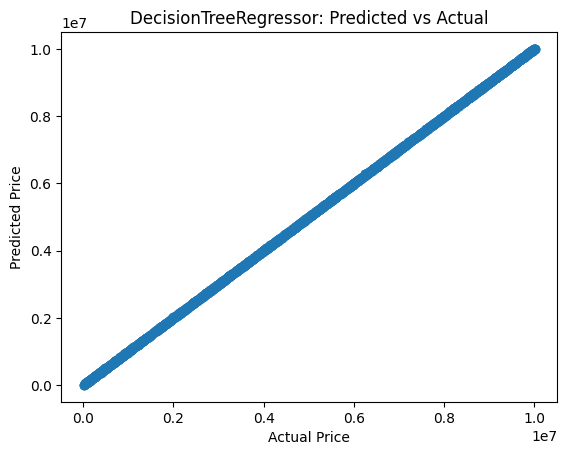

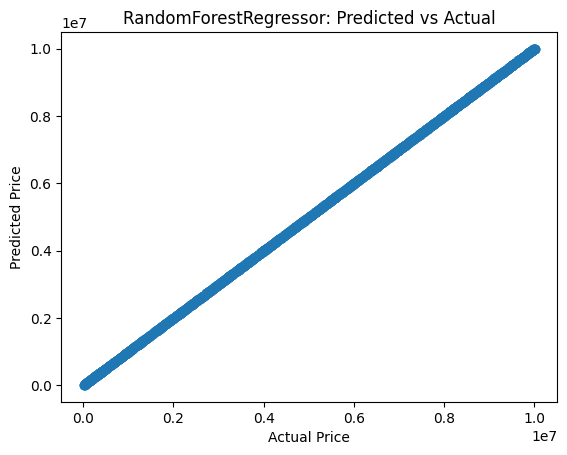

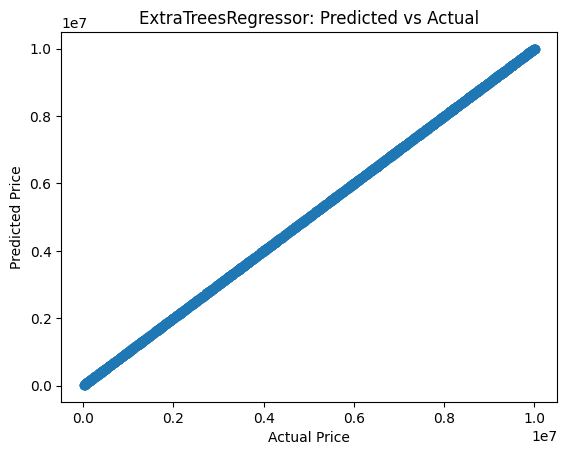

                Model          MSE        RMSE       R2
  ExtraTreesRegressor 1.066675e+07 3265.999153 0.999999
RandomForestRegressor 1.587248e+07 3984.027977 0.999998
DecisionTreeRegressor 3.253636e+07 5704.065205 0.999996


In [23]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R2": r2})

    # Predicted vs Actual scatter plot
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{name}: Predicted vs Actual")
    plt.show()

# 8) Results table (sorted by RMSE)
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df.to_string(index=False))


Among the three tree-based regression models, ExtraTreesRegressor achieved the best performance with the lowest RMSE and highest R² score. While the Decision Tree model tends to overfit, ensemble methods such as Random Forest and Extra Trees improve generalization by averaging multiple trees, with Extra Trees benefiting from increased randomness.